In [24]:
import numpy as np
import pandas as pd
import os
import json
from PIL import Image
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
import random
import cv2
# from pycocotools.coco import COCO
import time

import warnings
warnings.filterwarnings('ignore')

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
# import albumentations as A
# from albumentations.pytorch import ToTensorV2

import torchvision.models as models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN

from torchvision.models import mobilenet_v3_large
import torch.nn as nn
from torch.nn import functional as F

In [25]:
device_id = -1
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'

device

'cpu'

In [ ]:
''' torch.save({'epoch': epoch,
                    'model_state_dict': model1.state_dict(),
                    'optimizer_state_dict': optimizer1.state_dict(),
                    'loss_train': loss1_train,
                    'loss_val': loss1_val,
                    }, f'./chkpt_model1_d_{epoch}.pth') '''

In [ ]:
epoch: 8, step: 0, loss: 0.11465675383806229
epoch: 8, step: 100, loss: 0.06095666438341141
epoch: 8, step: 200, loss: 0.061912138015031815
epoch: 8, step: 300, loss: 0.06928233802318573
epoch: 8, step: 400, loss: 0.061911068856716156
epoch: 8, step: 500, loss: 0.06494654715061188
epoch: 8, step: 600, loss: 0.04671867936849594
epoch: 8, step: 700, loss: 0.06772258132696152
epoch: 8, step: 800, loss: 0.04367842897772789
epoch: 8, step: 900, loss: 0.07615616917610168
epoch: 8, step: 1000, loss: 0.05269436538219452
epoch: 8, step: 1100, loss: 0.08676540851593018
epoch: 8, step: 1200, loss: 0.05103033408522606
epoch: 8, step: 1300, loss: 0.04741634801030159
epoch: 8, step: 1400, loss: 0.04464217647910118
epoch: 8, step: 1500, loss: 0.07110461592674255
epoch: 8, step: 1600, loss: 0.08723729103803635
epoch: 8, step: 1700, loss: 0.05729527771472931
epoch: 8, step: 1800, loss: 0.06858286261558533
epoch: 8, step: 1900, loss: 0.08864135295152664
epoch: 8, step: 2000, loss: 0.052128467708826065
epoch: 8, step: 2100, loss: 0.05340799689292908
epoch: 8, step: 2200, loss: 0.07954356074333191
epoch: 8, step: 2300, loss: 0.06505334377288818
epoch: 8, step: 2400, loss: 0.08370300382375717
epoch: 8, step: 2500, loss: 0.04661274701356888
epoch: 8, step: 2600, loss: 0.06618595868349075
epoch: 8, step: 2700, loss: 0.07413885742425919
epoch: 8, step: 2800, loss: 0.044667307287454605
epoch: 8, step: 2900, loss: 0.04066767916083336
epoch: 8, step: 3000, loss: 0.05110293626785278
epoch: 8, step: 3100, loss: 0.06553219258785248
epoch: 8, step: 3200, loss: 0.0568765290081501
epoch: 8, step: 3300, loss: 0.05977854132652283
epoch: 8, step: 3400, loss: 0.04232174903154373
epoch: 8, step: 3500, loss: 0.06616692245006561
epoch: 8, step: 3600, loss: 0.058075983077287674
epoch: 8, step: 3700, loss: 0.05872802808880806
epoch: 8, step: 3800, loss: 0.038321349769830704
epoch: 8, step: 3900, loss: 0.05796002224087715
epoch: 8, step: 4000, loss: 0.06606904417276382
epoch: 8, step: 4100, loss: 0.08068716526031494
epoch: 8, step: 4200, loss: 0.11630742251873016
epoch: 8, step: 4300, loss: 0.06167994439601898
epoch: 8, step: 4400, loss: 0.0537746399641037
epoch: 8, step: 4500, loss: 0.05673856660723686
epoch: 8, step: 4600, loss: 0.06304197758436203
epoch: 8, step: 4700, loss: 0.06502911448478699
epoch: 8, step: 4800, loss: 0.05750361084938049
epoch: 8, step: 4900, loss: 0.06910700350999832
epoch: 8, step: 5000, loss: 0.039954472333192825
epoch: 8, step: 5100, loss: 0.060733113437891006
epoch: 8, step: 5200, loss: 0.08094808459281921
epoch: 8, step: 5300, loss: 0.09609630703926086
epoch: 8, step: 5400, loss: 0.050675686448812485
epoch: 8, step: 5500, loss: 0.11780954897403717
epoch: 8, step: 5600, loss: 0.05151147022843361
epoch: 8, step: 5700, loss: 0.0758868008852005
epoch: 8, step: 5800, loss: 0.09391523897647858
epoch: 8, step: 5900, loss: 0.1371631920337677
epoch: 8, step: 6000, loss: 0.07445535808801651
epoch: 8, step: 6100, loss: 0.03970108553767204
epoch: 8, step: 6200, loss: 0.10275699198246002
epoch: 8, step: 6300, loss: 0.09197346121072769
epoch: 8, step: 6400, loss: 0.05812101066112518
epoch: 8, step: 6500, loss: 0.056563932448625565
epoch: 8, step: 6600, loss: 0.08163539320230484
epoch: 8, step: 6700, loss: 0.06786281615495682
epoch: 8, step: 6800, loss: 0.07012347877025604
epoch: 8, step: 6900, loss: 0.07919788360595703
epoch: 8, step: 7000, loss: 0.07435940951108932
epoch: 8, step: 7100, loss: 0.04776246100664139
epoch: 8, step: 7200, loss: 0.05909908562898636
epoch: 8, step: 7300, loss: 0.06936298310756683
epoch: 8, step: 7400, loss: 0.08091621845960617
epoch: 8, step: 7500, loss: 0.09632544964551926
epoch: 8, step: 7600, loss: 0.06654670089483261
epoch: 8, step: 7700, loss: 0.0420994758605957
epoch: 8, step: 7800, loss: 0.05553479865193367
epoch: 8, step: 7900, loss: 0.04440377652645111
Эпоха train: 8 Итераций: 7931 train loss: 9.093099652916708e-06
epoch: 8, step: 0, loss: 0.04210697486996651
epoch: 8, step: 100, loss: 0.0393771231174469
epoch: 8, step: 200, loss: 0.034705258905887604
epoch: 8, step: 300, loss: 0.05905282869935036
epoch: 8, step: 400, loss: 0.15857379138469696
epoch: 8, step: 500, loss: 0.0938638374209404
epoch: 8, step: 600, loss: 0.07090742886066437
epoch: 8, step: 700, loss: 0.09134680032730103
epoch: 8, step: 800, loss: 0.08628299832344055
Потрачено 321.1 минут на 8 эпоху
Эпоха val: 8 Итераций: 832 val loss: 3.200718604672987e-05
epoch: 9, step: 0, loss: 0.0914456844329834
epoch: 9, step: 100, loss: 0.07005184143781662
epoch: 9, step: 200, loss: 0.0562298484146595
epoch: 9, step: 300, loss: 0.06629473716020584
epoch: 9, step: 400, loss: 0.05440688133239746
epoch: 9, step: 500, loss: 0.062358446419239044
epoch: 9, step: 600, loss: 0.05483250319957733
epoch: 9, step: 700, loss: 0.07313770055770874
epoch: 9, step: 800, loss: 0.076283760368824
epoch: 9, step: 900, loss: 0.05799609795212746
epoch: 9, step: 1000, loss: 0.09902697056531906
epoch: 9, step: 1100, loss: 0.05737515166401863
epoch: 9, step: 1200, loss: 0.09910544753074646
epoch: 9, step: 1300, loss: 0.05055427923798561
epoch: 9, step: 1400, loss: 0.08951665461063385
epoch: 9, step: 1500, loss: 0.0362640842795372
epoch: 9, step: 1600, loss: 0.08637844026088715
epoch: 9, step: 1700, loss: 0.06718795001506805
epoch: 9, step: 1800, loss: 0.054767921566963196

In [76]:
checkpoint1 = torch.load('./m1_d/chkpt_model1_d_7.pth', map_location=device)

Text(0.5, 1.0, 'fasterrcnn_resnet50_fpn_v2')

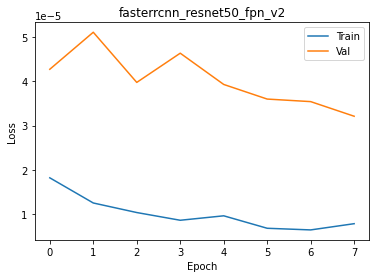

In [77]:
# тренировка на большом датасете
t = 'fasterrcnn_resnet50_fpn_v2'
fig, ax  = plt.subplots()
ax.plot(checkpoint1['loss_train'], label='Train')
ax.plot(checkpoint1['loss_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

In [78]:
checkpoint2 = torch.load('./m1_clf/chkpt_model1_clf_9.pth', map_location=device)

In [81]:
t = 'mobilenet_v3_large'

Text(0.5, 1.0, 'mobilenet_v3_large')

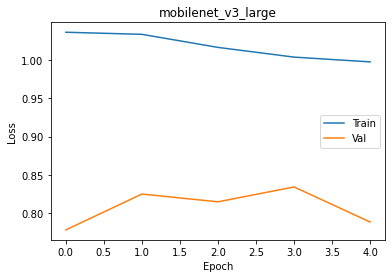

In [82]:
# тренировка на большом датасете
fig, ax  = plt.subplots()
ax.plot(checkpoint2['loss_train'], label='Train')
ax.plot(checkpoint2['loss_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))

Text(0.5, 1.0, 'mobilenet_v3_large')

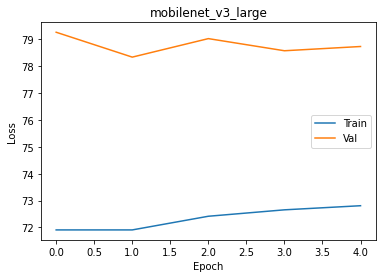

In [86]:
fig, ax  = plt.subplots()
ax.plot(checkpoint2['acc_train'], label='Train')
ax.plot(checkpoint2['acc_val'], label='Val')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()
plt.title('{}'.format(t))